In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('../data_cleaned/top_100_saas_companies_2025_cleaned.csv')

# Show the head of dataset
df.head()

,Company Name,Founded Year,HQ,Industry,Total Funding,ARR,Valuation,Employees,Top Investors,Product,G2 Rating
0,Microsoft,1975,"Redmond, WA, USA",Enterprise Software,1.000000e+09,2.700000e+11,3.000000e+12,221000.0,"Bill Gates, Paul Allen","Azure, Office 365, Teams",4.4
1,Salesforce,1999,"San Francisco, CA, USA",CRM,6.540000e+07,3.790000e+10,2.278000e+11,75000.0,"Halsey Minor, Larry Ellison","Sales Cloud, Service Cloud",4.3
2,Adobe,1982,"San Jose, CA, USA",Creative Software,2.500000e+06,1.940000e+10,2.400000e+11,29945.0,Hambrecht & Quist,"Creative Cloud, Document Cloud",4.5
3,Oracle,1977,"Austin, TX, USA",Database & Enterprise,2.000000e+03,5.290000e+10,3.500000e+11,143000.0,"Larry Ellison, Bob Miner","Oracle Cloud, NetSuite",4.0
4,Intuit,1983,"Mountain View, CA, USA",Financial Software,2.730000e+08,1.440000e+10,1.800000e+11,18200.0,"Sierra Ventures, Kleiner Perkins","QuickBooks, TurboTax",4.4


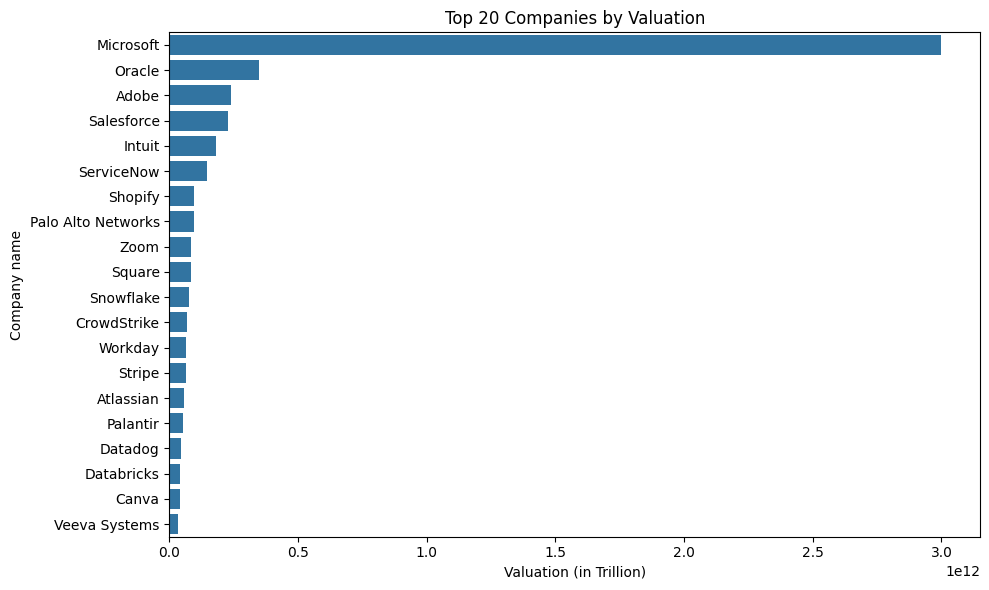

In [3]:
# Top 20 Company by Valuation
top_20_valuation = df['Valuation'].nlargest(20)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_valuation.values, y=df.loc[top_20_valuation.index, 'Company Name'])
plt.xlabel('Valuation (in Trillion)')
plt.ylabel('Company name')
plt.title('Top 20 Companies by Valuation')
plt.tight_layout()
plt.savefig('../visualizations/top_20_companies_by_valuation.png')
plt.show()

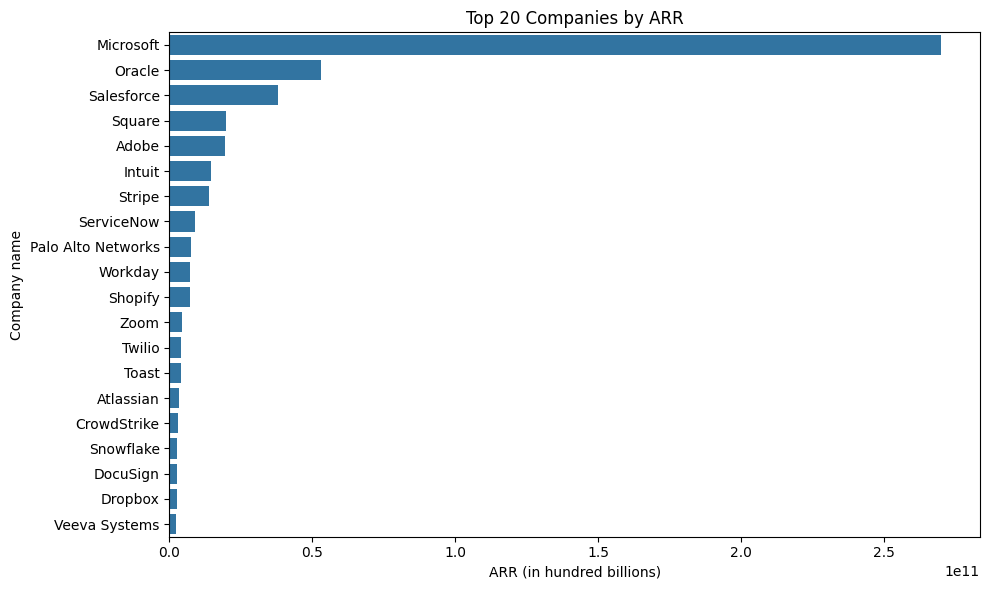

In [4]:
# Top 20 Company by ARR
top_20_arr = df['ARR'].nlargest(20)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_arr.values, y=df.loc[top_20_arr.index, 'Company Name'])
plt.xlabel('ARR (in hundred billions)')
plt.ylabel('Company name')
plt.title('Top 20 Companies by ARR')
plt.tight_layout()
plt.savefig('../visualizations/top_20_companies_by_arr.png')
plt.show()

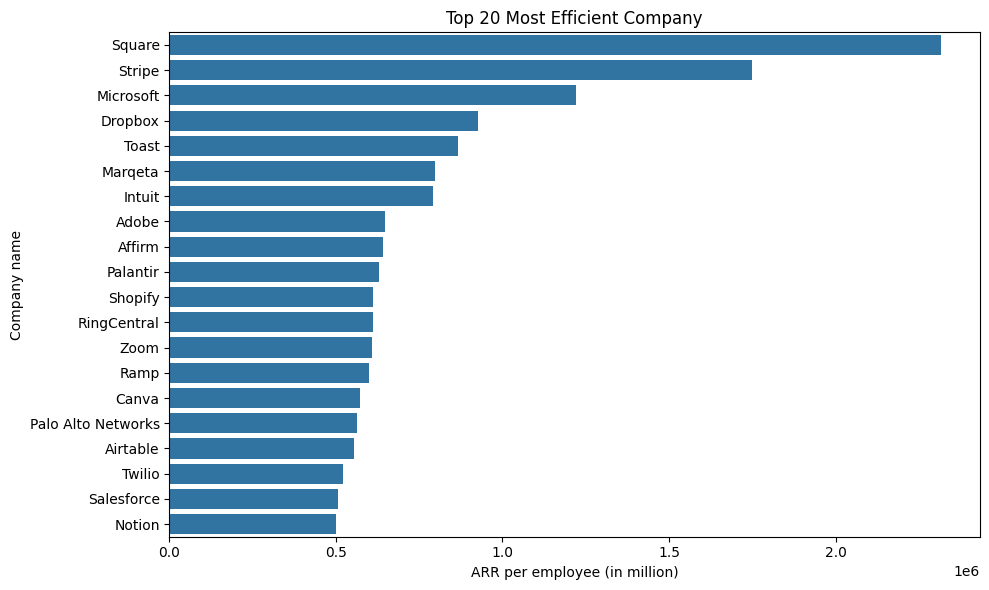

In [5]:
# Top 20 Most Efficient Company 
df['ARR per Employee'] = df['ARR'] / df['Employees']
top_20_arr_per_employee = df['ARR per Employee'].nlargest(20)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_arr_per_employee.values, y=df.loc[top_20_arr_per_employee.index, 'Company Name'])
plt.xlabel('ARR per employee (in million)')
plt.ylabel('Company name')
plt.title('Top 20 Most Efficient Company')
plt.tight_layout()
plt.savefig('../visualizations/top_20_efficient_companies_by_arr.png')
plt.show()

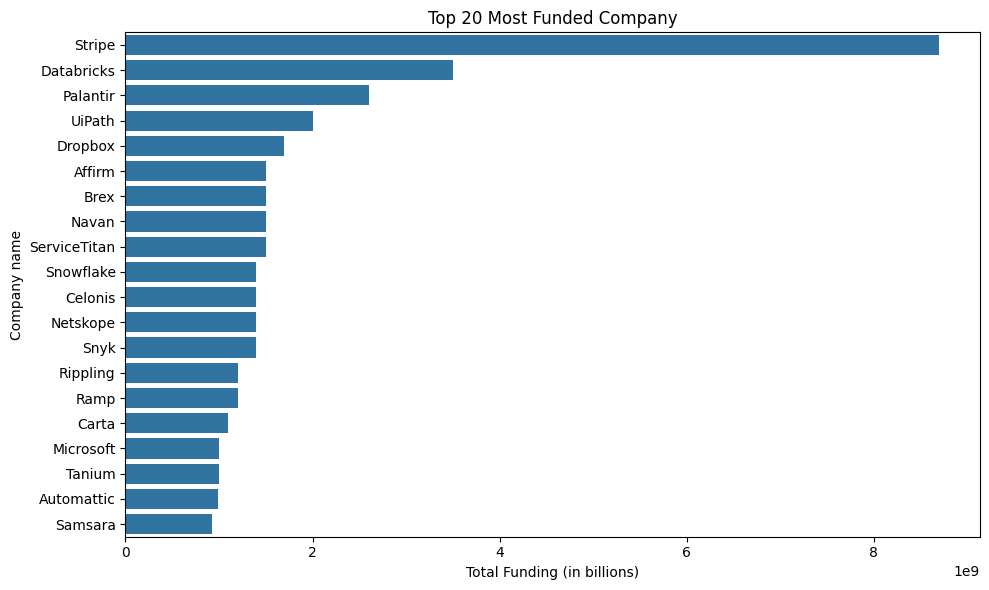

In [6]:
# Top 20 Most Funded Company
top_20_funded = df['Total Funding'].nlargest(20)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_funded.values, y=df.loc[top_20_funded.index, 'Company Name'])
plt.xlabel('Total Funding (in billions)')
plt.ylabel('Company name')
plt.title('Top 20 Most Funded Company')
plt.tight_layout()
plt.savefig('../visualizations/top_20_funded_company.png')
plt.show()

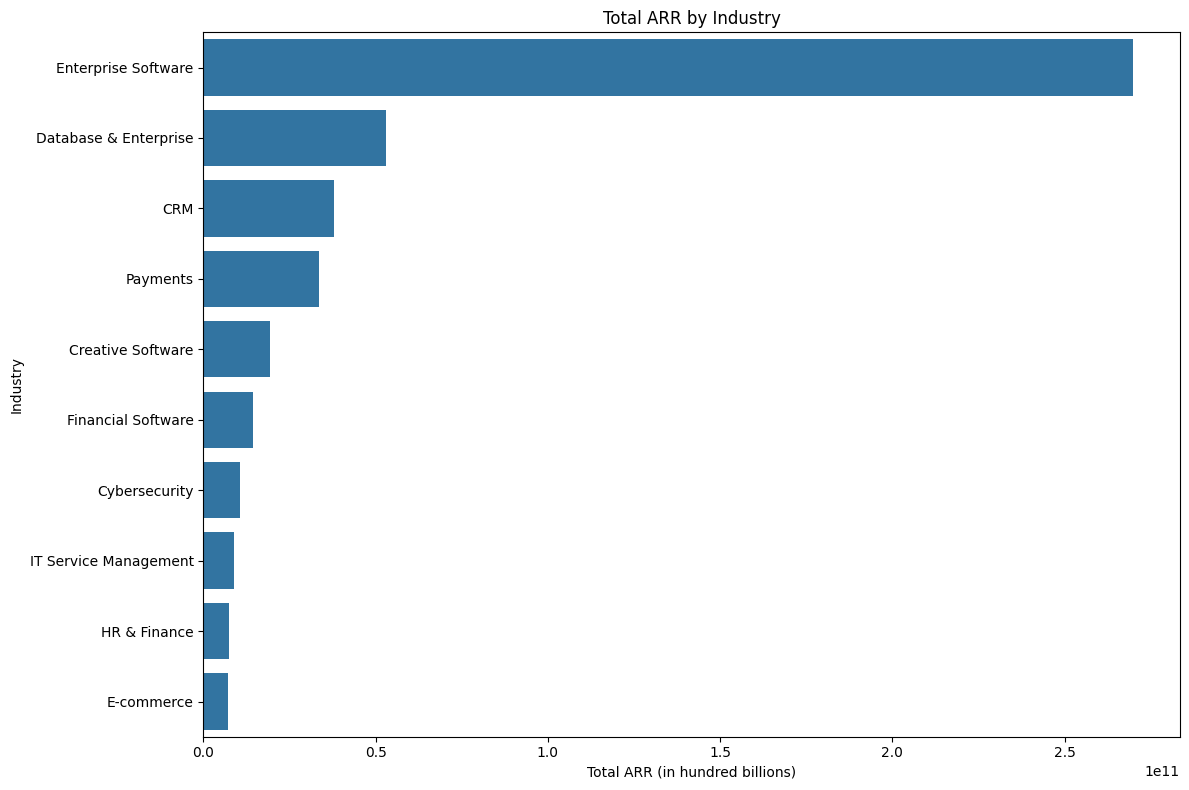

In [7]:
total_arr_per_industry = df.groupby('Industry')['ARR'].sum().sort_values(ascending=False)
# Get the top 10 industries by total ARR
top_10_industries_arr = total_arr_per_industry.head(10)

# Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_industries_arr.values, y=top_10_industries_arr.index)
plt.xlabel('Total ARR (in hundred billions)')
plt.ylabel('Industry')
plt.title('Total ARR by Industry')
plt.savefig('../visualizations/top_10_total_arr_industry.png')
plt.tight_layout()
plt.show()

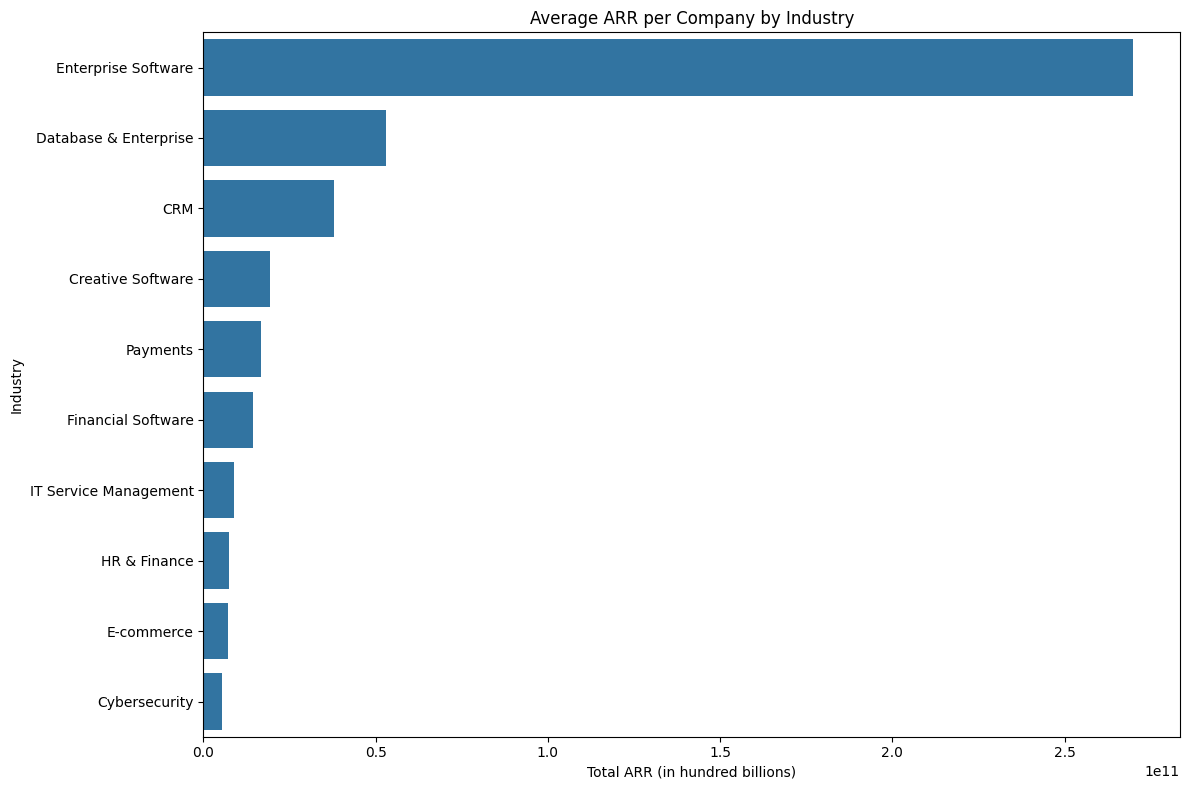

In [8]:
# Top 10 Industries by Average ARR per Company
avg_arr_per_industry = df.groupby('Industry')['ARR'].mean().sort_values(ascending=False)
# Get the top 10 industries by average ARR per company
top_10_industries_avg_arr = avg_arr_per_industry.head(10)

# Visualize the data
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_industries_avg_arr.values, y=top_10_industries_avg_arr.index)
plt.xlabel('Total ARR (in hundred billions)')
plt.ylabel('Industry')
plt.title('Average ARR per Company by Industry')
plt.tight_layout()
plt.savefig('../visualizations/top_10_avg_arr_industry.png')
plt.show()

In [9]:
# Add Company Age Column
df['Company Age'] = 2025 - df['Founded Year']

# Add ARR per Employee Column
df['ARR per Employee'] = df['ARR'] / df['Employees']

print(df['Company Age'])
print(df['ARR per Employee'])

0     50
1     26
2     43
3     48
4     42
      ..
82    14
83    13
84    23
85    20
86    21
Name: Company Age, Length: 87, dtype: int64
0     1.221719e+06
1     5.053333e+05
2     6.478544e+05
3     3.699301e+05
4     7.912088e+05
          ...     
82    2.000000e+05
83    2.537037e+05
84    2.946875e+05
85    2.000000e+05
86    3.608333e+05
Name: ARR per Employee, Length: 87, dtype: float64


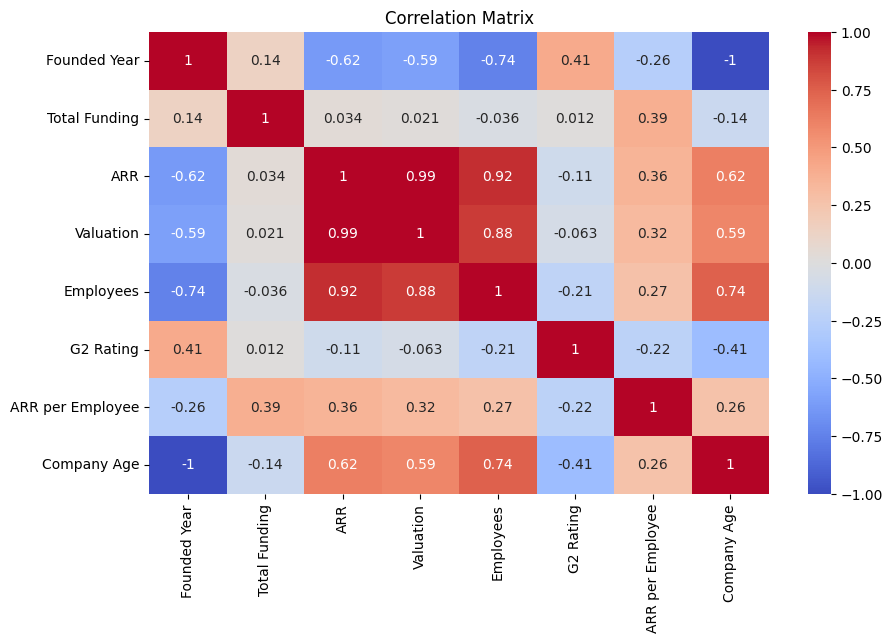

In [18]:
correlation_matrix = df.corr(numeric_only=True)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../visualizations/correlation_matrix.png')
plt.show()

In [11]:
df.columns

Index(['Company Name', 'Founded Year', 'HQ', 'Industry', 'Total Funding',
       'ARR', 'Valuation', 'Employees', 'Top Investors', 'Product',
       'G2 Rating', 'ARR per Employee', 'Company Age'],
      dtype='object')

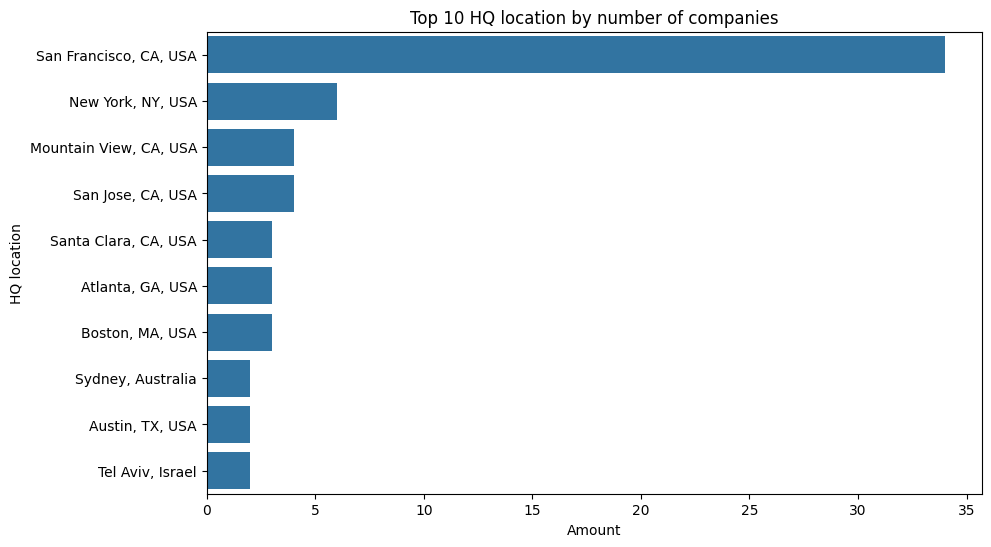

In [12]:
# Top 10 HQ locations by number of companies
top_10_hq = df['HQ'].value_counts().head(10)

# Visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_hq.values, y=top_10_hq.index)
plt.title('Top 10 HQ location by number of companies')
plt.xlabel('Amount')
plt.ylabel('HQ location')
plt.savefig('../visualizations/top_10_hq_location.png')
plt.show()

Correlation between ARR and Total Funding: 0.034


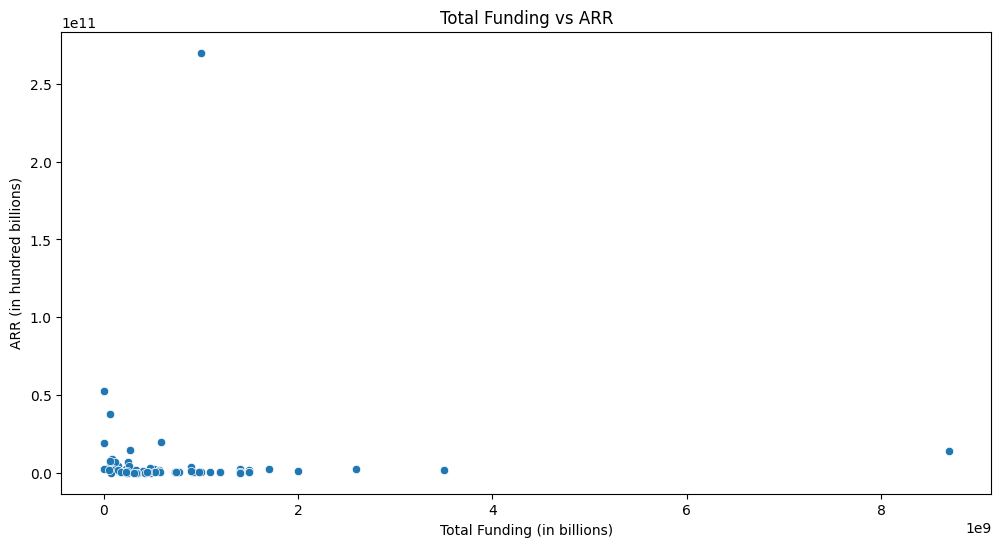

In [13]:
# Correlation between ARR and Total Funding
arr_funding_corr = df['ARR'].corr(df['Total Funding'])
print(f"Correlation between ARR and Total Funding: {arr_funding_corr:.3f}")

# Visualize the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Funding', y='ARR', data=df)
plt.title('Total Funding vs ARR')
plt.xlabel('Total Funding (in billions)')
plt.ylabel('ARR (in hundred billions)')
plt.savefig('../visualizations/total_funding_vs_arr.png')
plt.show()

Correlation between Valuation and Total Funding: 0.021


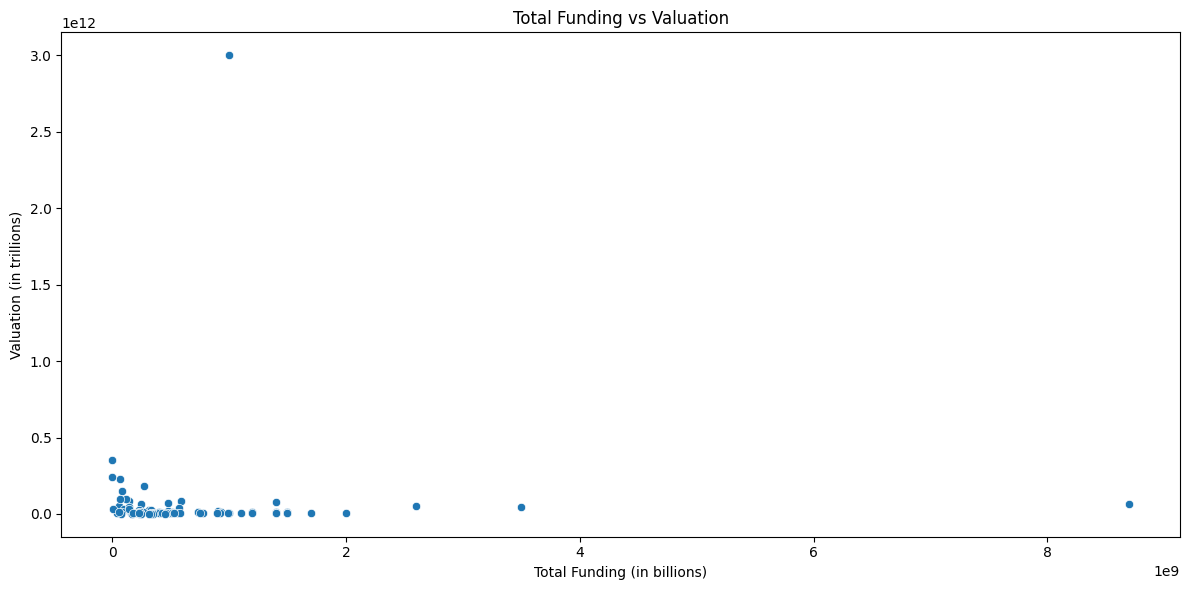

In [14]:
# Correlation between Valuation and Total Funding
valuation_funding_corr = df['Valuation'].corr(df['Total Funding'])
print(f"Correlation between Valuation and Total Funding: {valuation_funding_corr:.3f}")

# Visualize the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total Funding', y='Valuation', data=df)
plt.title('Total Funding vs Valuation')
plt.xlabel('Total Funding (in billions)')
plt.ylabel('Valuation (in trillions)')
plt.tight_layout()
plt.savefig('../visualizations/total_funding_vs_valuation.png')
plt.show()

Correlation between ARR and Valuation: 0.993


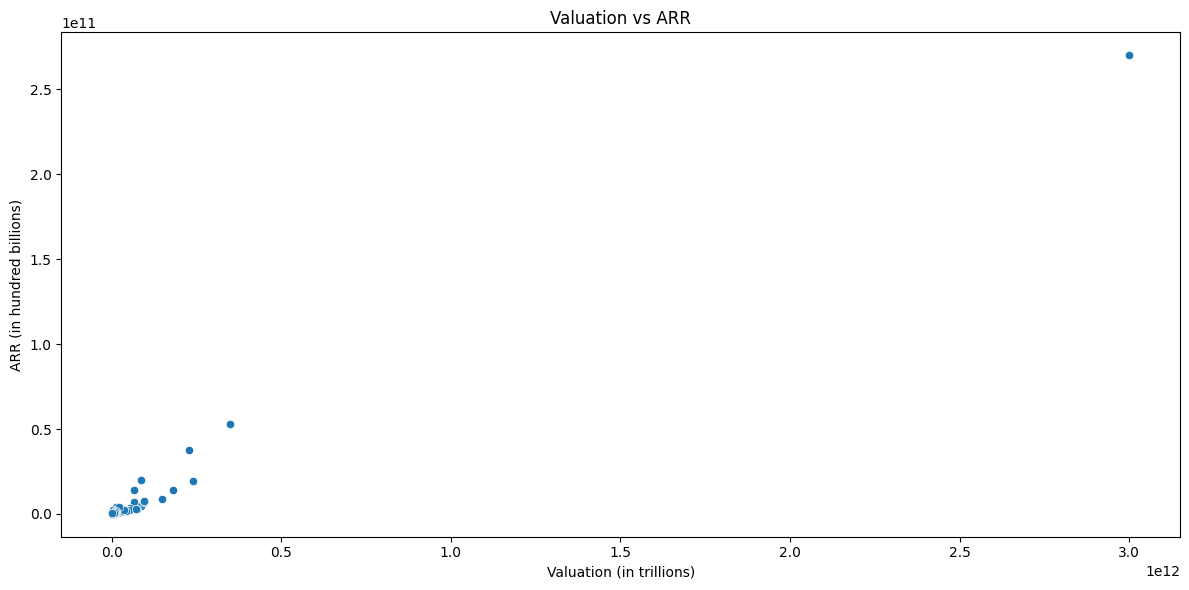

In [17]:
# Correlation between ARR and Valuation
arr_valuation_corr = df['ARR'].corr(df['Valuation'])
print(f"Correlation between ARR and Valuation: {arr_valuation_corr:.3f}")

# Visualize the data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Valuation', y='ARR', data=df)
plt.title('Valuation vs ARR')
plt.xlabel('Valuation (in trillions)')
plt.ylabel('ARR (in hundred billions)')
plt.tight_layout()
plt.savefig('../visualizations/valuation_vs_arr.png')
plt.show()

In [16]:
bins = [0, 1000, 5000, 20000, float('inf')]
labels = ['Small (300–999)', 'Medium (1K–4.9K)', 'Large (5K–19.9K)', 'Enterprise (20K+)']


df['employee_group'] = pd.cut(df['Employees'], bins=bins, labels=labels)

group_stats = df.groupby('employee_group').agg({
    'ARR': 'mean',
    'Valuation': 'mean',
    'ARR per Employee': 'mean'
}).reset_index()

group_stats['ARR_billions'] = group_stats['ARR'] / 1e9
group_stats['Valuation_billions'] = group_stats['Valuation'] / 1e9
group_stats['ARR_per_Employee_millions'] = group_stats['ARR per Employee'] / 1e6

table = group_stats[['employee_group', 'ARR_billions', 'Valuation_billions', 'ARR_per_Employee_millions']]
table.columns = ['Company Size', 'Avg ARR ($B)', 'Avg Valuation ($B)', 'Avg ARR per Employee ($M)']
table = table.round(2)

print(table.to_string(index=False))

     Company Size  Avg ARR ($B)  Avg Valuation ($B)  Avg ARR per Employee ($M)
  Small (300–999)          0.26                5.09                       0.35
 Medium (1K–4.9K)          0.96               12.65                       0.34
 Large (5K–19.9K)          5.88               63.06                       0.61
Enterprise (20K+)         95.05              954.45                       0.69


C:\Users\pdeny\AppData\Local\Temp\ipykernel_13164\2575964516.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = df.groupby('employee_group').agg({
